# Tarea 3.10

### Fabricio Vásquez Bustamante 17.993.938-K

Tenemos la siguiente ecuación diferencial

$$
\frac{d}{dx} f(x) = 20 f(x)
$$

y queremos encontrar una $f(x)$ que la cumple y satisface $f(0) = 1$. La respuesta que se obtiene integrando $f(x) = e^{20 x}$ pero imaginemos que no lo sabemos. Una manera aproximada de encontrar $f(1)$ es empezar en $f(0)$ y luego dar un pequeño paso para encontrar $f(\delta x)$ usando

$$
f(\delta x) \approx f(0) + \delta x \frac{d}{dx}f(0) = f(0) + 20\,\delta x f(0)\,.
$$

Luego podemos encontrar $f(2\delta x)$ de manera análoga

$$
f(2\delta x) \approx f(\delta x) + 20\,\delta x f(\delta x)
$$

Si repetimos el proceso $n$ veces tal que $n\,\delta x = 1$, podemos encontrar una solución aproximada para $f(1)$.

Escriba un código que haga lo que acabamos de describir en $n$ pasos. Luego grafique el error relativo de la aproximación en función de $n$ y estime la convergencia de este método. 

Para lograrlo, grafique varias potencias de $n$ en un gráficoo log-log y encuentre cuál tiene una pendiente similar a lo que usted obtuvo.

Este programa encuentra una solución aproximada para la siguiente Ecuación Diferencial:
df(x)/dx=20f(x)
Con la condición inicial f(0)=1
Por favor escoja el número de pasos para aproximarnos numéricamente a dicha Ecuación Diferencial, este
valor debe ser un número entero mayor que 1
n=5456




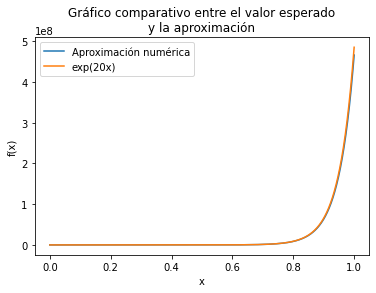

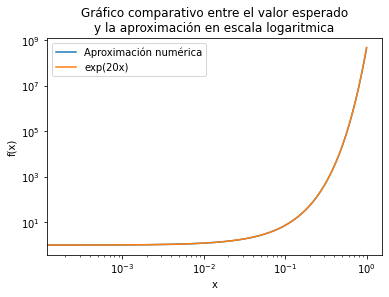

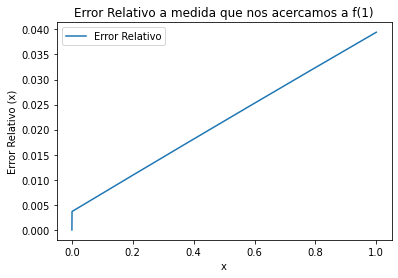

La aproximación es bastante buena.
A continuación le mostraremos un gráfico de los Erroreres Relativos para diversos valores de n


c:\users\fabriciovásquezbusta\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\fabriciovásquezbusta\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119899 missing from current font.
  font.set_text(s, 0, flags=flags)


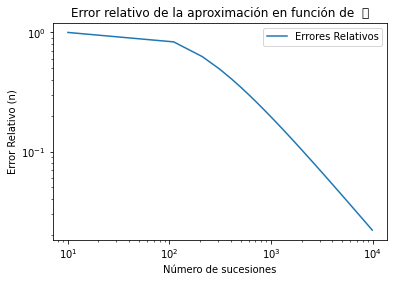

Podemos observar que el error tiende a cero a medida que el número de operaciónes tiende a infinito


In [13]:
import matplotlib.pyplot as plt   #Importamos Librertías.
import numpy as np

print('Este programa encuentra una solución aproximada para la siguiente Ecuación Diferencial:')
print('df(x)/dx=20f(x)\nCon la condición inicial f(0)=1')
print('Por favor escoja el número de pasos para aproximarnos numéricamente a dicha Ecuación Diferencial, este')
print('valor debe ser un número entero mayor que 1')

while True:            #Se le solicita al usuario ingresar el valor de "n".
    n=int(input("n="))
    if n>1 and n%1==0:
        break
    print('Porfavor escriba un número entero mayor que uno')
   
i=1                 #Contador de pasos. (Partimos en i=1 debido a que los primeros valores de f, y, e & errorrel ya vienen dados
f=1                 #f(0)=1.
y=np.ones(n)        #Arreglo de unos con "n" elementos, estos serán reemplazados por la aproximación de la solución de la E. D.
e=np.ones(n)        #Arreglo de unos con "n" elementos, estos serán reemplazados por la solución de la E. D.
errorrel=np.zeros(n)#Arreglo de ceros con "n" elementos, estos serán reemplazados por el error relativo de la aproximación.

while i<n:          #Ciclo while que se romperá cuando sucedan "n" ciclos.
    f=f+(20*f/n)    #Aproximación.
    y[i]=f          #Se reemplaza el i-ésimo término del Arreglo de la aproximación de la solución de la E.D.
    e[i]=np.exp((i+1)*20/n) #Se reemplaza el i-ésimo termino del Arreglo de la solución de la E. D.
    errorrel[i]=np.abs(y[i]-e[i])/np.abs(e[i])
    i=i+1           #Se aumenta en uno nuestro contador.

x=np.linspace(0,1,n)#Se genera un arreglo entre 0 y 1 subdividido en "n" elementos que será usado como eje de diversos gráficos.
print('\n')          

plt.plot(x, y, label='Aproximación numérica')                                 #Graficamos los datos.
plt.plot(x, e, label='exp(20x)')
plt.title('Gráfico comparativo entre el valor esperado\ny la aproximación')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()                                                                    #Mostramos el gráfico.


plt.loglog(x, y, label='Aproximación numérica')                               #Graficamos en escala logaritmica.
plt.loglog(x, e, label='exp(20x)')
plt.title('Gráfico comparativo entre el valor esperado\ny la aproximación en escala logaritmica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()                                                                    # Mostramos el gráfico.

print()                                                                       #Graficamos el error relativo entre 0 y 1.
plt.plot(x, errorrel, label='Error Relativo') #Graficamos los datos.
plt.title('Error Relativo a medida que nos acercamos a f(1)')
plt.xlabel('x')
plt.ylabel('Error Relativo (x)')
plt.legend()
plt.show()                                                                   #Mostramos el gráfico.



if errorrel[n-1]<0.1:                                                        #La interfaz le dirá al usuario que tan buena o
    print('La aproximación es bastante buena.')                              #o mala fue su elección de "n".
elif errorrel[n-1]<0.2:
    print('La aproximación es buena.')
elif errorrel[n-1]<0.7:
    print('La aproximación es regular, podría aumentar el número de pasos para mejorar el resultado.')
else:
    print('La aproximacion es mala, le sugerimos aumentar el número de pasos.')
print('A continuación le mostraremos un gráfico de los Erroreres Relativos para diversos valores de n')



def aprox(m):                #Se define la función de la aproximacimación de la E.D, realizamos este paso debido a que la
    i=1                      #usaremos para calcular los errores relativos con respecto a distintos n.
    f=1
    while i<m:
        f=f+(20*f/m)
        i=i+1
    errorr=np.abs(f-np.exp(20))/np.abs(np.exp(20))
    return errorr


m=np.arange(10,10000,100)    #Arreglo de los posibles valores de "n" (estos se pueden modificar mediate la edición del código).
                             #
er=np.ones(len(m))           #Arreglo de ceros con igual número de elementos que el arreglo anterior,
                             #estos serán reemplazados por los errores relativos con respecto "n".
for j in range(len(m)):      #Para cada valor de n se usa la función de aprox para encontrar el error relativo de la aproximación
    er[j]=aprox(m[j])        #de la E.D., estos valores se guardan el arreglo "er" 

plt.loglog(m, er, label='Errores Relativos')            #Graficamos los errores relativos con respectoa n en escala logaritmica.
plt.title('Error relativo de la aproximación en función de  𝑛')
plt.xlabel('Número de sucesiones')
plt.ylabel('Error Relativo (n)')
plt.legend()
plt.show()                   # Mostramos el gráfico

print('Podemos observar que el error tiende a cero a medida que el número de operaciónes tiende a infinito')

# Calificación: 5.5

El código está bien escrito, pero faltó estimar la convergencia de la aproximación. ¿La convergencia es como $1/n$, $1/n^2$ u otra potencia?